### import required libraries

In [3]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dropout
from keras.layers import Dense,Activation,Flatten
from keras.utils import multi_gpu_model
from keras import backend as K
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from numpy import argmax
import matplotlib.pyplot as plt
import os
print(os.listdir("../input"))


['hw2q3test.csv', 'hw2q3unlabeled.csv', 'hw2q3train.csv']


### load the training and test dataset

In [4]:
data=pd.read_csv("../input/hw2q3train.csv")    #training dataset using pandas 
test_data=pd.read_csv("../input/hw2q3test.csv")  #test dataset " """"""""""

In [5]:
train=np.array(data)        #convert training dataset into numpy array from the pandas dataframe
train.shape

(60000, 785)

In [6]:
x_train=train[:,1:]         #training features
y_train=train[:,0]          #training labels

In [7]:
test=np.array(test_data)      #convert test dataset into numpy array from pandas dataframe
test.shape

(10000, 785)

In [8]:
x_test=test[:,1:]         #test features values
y_test=test[:,0]          #test labels

In [9]:
print("no of training examples:",x_train.shape[0])
print("no of test examples:",x_test.shape[0])

no of training examples: 60000
no of test examples: 10000


In [10]:
length=x_train.shape[0]
xx_train=[]
for i in range(length):
    t=x_train[i,:]
    t=t.reshape(28,28)
    xx_train.append(t)
xx_train=np.array(xx_train)

In [11]:
length=x_test.shape[0]
#print(length)
xx_test=[]
for i in range(length):
    t=x_test[i,:]
    t=t.reshape(28,28)
    xx_test.append(t)
xx_test=np.array(xx_test)

(60000, 28, 28)
(10000, 28, 28)


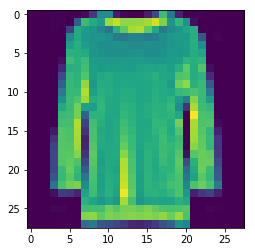

In [12]:
print(xx_train.shape)
print(xx_test.shape)

#plt.imshow(xx_train[7])  #display the random image from training dataset
plt.imshow(xx_train[199])

### normalize the training and test features

In [13]:
xx_train=xx_train/255
xx_test=xx_test/255
xx_train.shape

(60000, 28, 28)

### split the training  data between training and validataion data

In [14]:
xx_train,x_valid=xx_train[:50000],xx_train[50000:]
y_train,y_valid=y_train[:50000],y_train[50000:]
print("no of traiing set:",xx_train.shape[0])
print(' no of valid set:',x_valid.shape[0])

no of traiing set: 50000
 no of valid set: 10000


### Converts a class vector (integers) to binary class matrix.

In [15]:
y_train = keras.utils.to_categorical(y_train, 10)
y_valid = keras.utils.to_categorical(y_valid, 10)


In [32]:
y_test = keras.utils.to_categorical(y_test, 10)

In [17]:
xx_train=xx_train.reshape(xx_train.shape[0],28,28,1)
x_valid=x_valid.reshape(x_valid.shape[0],28,28,1)
xx_test=xx_test.reshape(xx_test.shape[0],28,28,1)

### create the neural architecture

In [18]:
model=Sequential()
model.add(Conv2D(64,kernel_size=2,strides=1,padding='same',activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(2))
model.add(Dropout(0.3))
model.add(Conv2D(32,kernel_size=2,strides=1,padding='same',activation='relu'))
model.add(MaxPooling2D(1))
model.add(Dropout(0.3))
model.add(Flatten())


In [19]:
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(10,activation='softmax'))

In [20]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
__________

In [21]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [22]:
score=model.fit(xx_train,y_train,epochs=10,batch_size=256,validation_data=[x_valid,y_valid])

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 7s 144us/step - loss: 0.6607 - acc: 0.7551 - val_loss: 0.3819 - val_acc: 0.8569
Epoch 2/10
50000/50000 [==============================] - 5s 102us/step - loss: 0.3943 - acc: 0.8588 - val_loss: 0.3306 - val_acc: 0.8776
Epoch 3/10
50000/50000 [==============================] - 5s 102us/step - loss: 0.3405 - acc: 0.8759 - val_loss: 0.2920 - val_acc: 0.8908
Epoch 4/10
50000/50000 [==============================] - 5s 102us/step - loss: 0.3091 - acc: 0.8872 - val_loss: 0.2704 - val_acc: 0.8971
Epoch 5/10
50000/50000 [==============================] - 5s 102us/step - loss: 0.2846 - acc: 0.8949 - val_loss: 0.2625 - val_acc: 0.9006
Epoch 6/10
50000/50000 [==============================] - 5s 102us/step - loss: 0.2636 - acc: 0.9030 - val_loss: 0.2515 - val_acc: 0.9078
Epoch 7/10
50000/50000 [==============================] - 5s 102us/step - loss: 0.2464 - acc: 0.9077 - val_loss: 0.2424 - 

In [23]:
history=model.evaluate(xx_test,y_test,batch_size=256)

10000/10000 [==============================] - 0s 32us/step


In [24]:
print("test_accuracy:",history[1])        #accuracy on test dataset

test_accuracy: 0.9157


In [28]:
y_pred=model.predict(xx_test)    

In [33]:
y_test.shape

(10000, 10)

In [34]:
y_pred=argmax(y_pred,axis=1)
y_test=argmax(y_test,axis=1)

### import scikit learn libraries to create confusion matrix

In [35]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report

In [36]:
matrix=confusion_matrix(y_test,y_pred,labels=[0,1,2,3,4,5,6,7,8,9])

In [37]:
matrix

array([[825,   0,  17,  21,   3,   1, 125,   0,   7,   1],
       [  0, 974,   0,  20,   3,   0,   1,   0,   2,   0],
       [ 11,   1, 852,   9,  50,   0,  77,   0,   0,   0],
       [  6,   3,   7, 940,  18,   0,  22,   0,   4,   0],
       [  0,   1,  28,  34, 886,   0,  51,   0,   0,   0],
       [  0,   0,   0,   0,   0, 981,   0,  12,   0,   7],
       [ 64,   0,  44,  34,  68,   0, 784,   0,   6,   0],
       [  0,   0,   0,   0,   0,   5,   0, 980,   0,  15],
       [  2,   2,   0,   4,   1,   2,   2,   4, 983,   0],
       [  0,   0,   0,   0,   0,   4,   1,  43,   0, 952]])

In [39]:
y_pred[6]


4

In [40]:
y_test[6]

4

### load the unlabeled dataset

In [42]:
unlabel_data=pd.read_csv("../input/hw2q3unlabeled.csv")
unlabel=np.array(unlabel_data)
unlabel.shape

(50, 785)

In [43]:
x_unlabels=unlabel[:,1:]
length=x_unlabels.shape[0]
x_labels=[]
for i in range(length):
    t=x_unlabels[i,:]
    t=t.reshape(28,28)
    x_labels.append(t)
x_labels=np.array(x_labels)

In [44]:
x_labels=x_labels.reshape(x_labels.shape[0],28,28,1)

In [45]:
y_labels=model.predict(x_labels)

In [46]:
y_labels=argmax(y_labels,axis=1)

In [48]:
pd.DataFrame(y_labels).to_csv("o_p.csv",index=False)

In [50]:
t=pd.read_csv('o_p.csv')
t

,0
0,6
1,6
2,0
3,0
4,0
5,1
6,1
7,1
8,1
9,1


In [51]:
pd.DataFrame(matrix).to_csv("cf.csv",index=False)

In [52]:
m=pd.read_csv('cf.csv')

In [53]:
m

,0,1,2,3,4,5,6,7,8,9
0,825,0,17,21,3,1,125,0,7,1
1,0,974,0,20,3,0,1,0,2,0
2,11,1,852,9,50,0,77,0,0,0
3,6,3,7,940,18,0,22,0,4,0
4,0,1,28,34,886,0,51,0,0,0
5,0,0,0,0,0,981,0,12,0,7
6,64,0,44,34,68,0,784,0,6,0
7,0,0,0,0,0,5,0,980,0,15
8,2,2,0,4,1,2,2,4,983,0
9,0,0,0,0,0,4,1,43,0,952
